In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

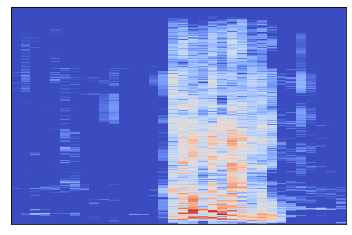

In [193]:
samples, sample_rate=librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Wrong\Dina Hussam\dina_wrong_9.wav")
spec=librosa.stft(samples,n_fft=4096,hop_length=4096//2)
spec=librosa.amplitude_to_db(np.abs(spec))
ax= librosa.display.specshow(spec)

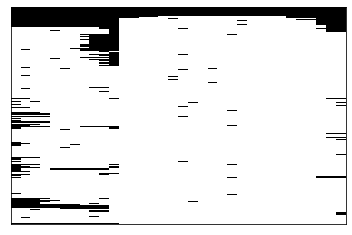

In [194]:
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (generate_binary_structure,
                                      iterate_structure, binary_erosion)
base=generate_binary_structure(2,1)
structure=iterate_structure(generate_binary_structure(2,1),5)
local_max=maximum_filter(spec, footprint=structure)==spec
librosa.display.specshow(local_max)

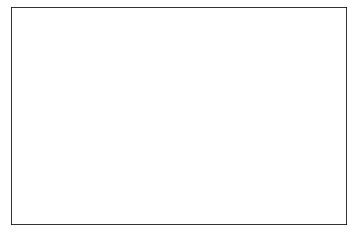

In [195]:
zeros= spec==0
eroded_zeros= binary_erosion(zeros,structure=structure,border_value=1)
librosa.display.specshow(eroded_zeros)

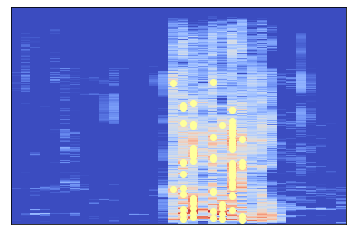

In [204]:
peaks=local_max^eroded_zeros
amps= spec[peaks]
i,j =np.where(peaks)
amps=amps.flatten()
zipped_peaks=zip(j,i,amps)
filter_peaks= filter(lambda x: x[2] > 5, zipped_peaks)
filter_peaks=np.array(list(filter_peaks))
time_idx=np.array(list(filter_peaks))[:,0]
freq_idx=np.array(list(filter_peaks))[:,1]
fig, ax = plt.subplots()
librosa.display.specshow(spec,ax=ax)
ax.scatter(time_idx, freq_idx, c='#ffff9c')

In [463]:
def get_peaks(signal):
    spec=librosa.stft(signal,n_fft=2048,hop_length=2048//2)
    spec=librosa.amplitude_to_db(np.abs(spec))
    base=generate_binary_structure(2,1)
    structure=iterate_structure(generate_binary_structure(2,1),8)
    local_max=maximum_filter(spec, footprint=structure)==spec
    zeros= spec==0
    eroded_zeros= binary_erosion(zeros,structure=structure,border_value=1)
    peaks=local_max^eroded_zeros
    amps= spec[peaks]
    i,j =np.where(peaks)
    amps=amps.flatten()
    zipped_peaks=zip(j,i,amps)
    filter_peaks= filter(lambda x: x[2] > 0, zipped_peaks)
    filter_peaks=np.array(list(filter_peaks))
    time_idx=np.array(list(filter_peaks))[:,0]
    freq_idx=np.array(list(filter_peaks))[:,1]
    return generate_hashes(list(zip(freq_idx,time_idx,spec)))

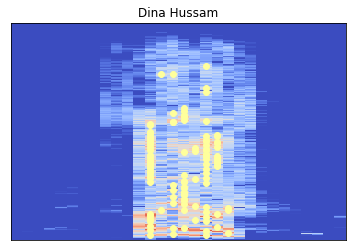

In [223]:
samples, sample_rate=librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Open the door\Dina Hussam\open the door 6_dina hussam.wav")
freq_idx,time_idx,spec=get_peaks(samples)
fig, ax = plt.subplots()
librosa.display.specshow(spec,ax=ax)
ax.scatter(time_idx, freq_idx, c='#ffff9c')
plt.title("Dina Hussam");

In [256]:
samples, sample_rate=librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Open the door\Romaisaa\open (4).wav")
freq_idx,time_idx,spec=get_peaks(samples)
# fig, ax = plt.subplots()
# librosa.display.specshow(spec,ax=ax)
# ax.scatter(time_idx, freq_idx, c='#ffff9c')
# plt.title("Romaisaa");

ValueError: too many values to unpack (expected 3)

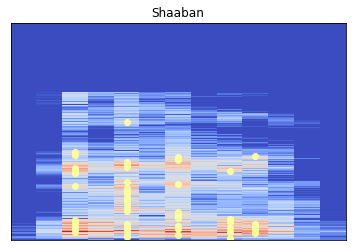

In [240]:
samples, sample_rate=librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Open the door\Shaban\Open_7.wav")
freq_idx,time_idx,spec=get_peaks(samples)
fig, ax = plt.subplots()
librosa.display.specshow(spec,ax=ax)
ax.scatter(time_idx, freq_idx, c='#ffff9c')
plt.title("Shaaban");

In [367]:
import hashlib
def generate_hashes(peaks, fan_value=20):
    mapper = {}
    if True:
        sorted(peaks, key=lambda x: x[1])
    for i in range(len(peaks)):
        for j in range(1, fan_value):
            if (i + j) < len(peaks):
                freq1 = peaks[i][0]
                freq2 = peaks[i + j][0]
                t1 = peaks[i][1]
                t2 = peaks[i + j][1]
                t_delta = t2 - t1
                if 0 <= t_delta <= 500:
                    h = hashlib.sha1('{}{}{}'.format(str(freq1), str(freq2), str(t_delta)).encode('utf-8'))
                    mapper[h.hexdigest()[0:20].upper()] = int(t1)
    return mapper

In [503]:
import os
import json
import codecs
path= "Team Audio"
data={}
for voice in os.listdir(path):
    samples, sr= librosa.load(os.path.join(path,voice))
    peaks= get_peaks(samples)
    data[os.path.splitext(voice)[0]]=peaks
file_path = "./team_fingerprints.json"
json.dump(data, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)

In [354]:
def match(origin_hashes,test_hashes):
    match = {}
    for song in origin_hashes.keys():
        match[song] = np.array(list(set(origin_hashes[song].keys()).intersection(test_hashes.keys())))
        if match[song].size == 0:
            del match[song]
    return match

In [434]:
samples, sr= librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Open the door\Romaisaa\open (16).wav")
match(data,get_peaks(samples))

{'Romaisaa (10)': array(['5AD7B242BD1667F694A4'], dtype='<U20'),
 'Romaisaa (3)': array(['E27F16B537ED3CEF4D0D', '103E556A0308618D2556',
        '7C76293DD7B786567050', 'A1F0EA82B089BB32D1BB',
        '5AF42D3C09E57AD1733E', 'FF56C3BCE8E5F4853354',
        '65341772328B337E55DA', '5E66772E9856B60453A9',
        '599BE22625BC389DBC36', '0764618E9C7803C04AF0',
        '8494C2297E0F092288BC', '4FC5AEC65E31976E24E1',
        '18E7068148579E2646AB', '37BB094261C9749D5CE9',
        'CD2665875930CADAB7B7', 'E6C3EC605BF7573A3829',
        '1F614A537D0E5F985317', 'D108FD085E307F30A06B',
        '941548586B201523A514', '6996DE497794F6781E6D',
        'F883B257791188B0BB47', '6130ED1BFDE17A576267',
        'CCAD68ED3ED40D3C247C', '5FF0B51DD6005EDACF84',
        'EBF5695710FA87B72166', 'EF4710B53853590B969A',
        '918C90D868EDCF677680', '28EC91014CC81030DB51',
        '9A444F3AA608C6556A92', '43C41CAAC69A78D5BA1D',
        'E37B00ABC08EE9567B69', 'E14960C944E1154A006A',
        '9941D77CCF3AC8

In [263]:
def align_match(origin_hashes,test_hashes,matched_hashes):
    d ={}
    arr =[]
    for song in matched_hashes.keys():
        d[song] = {}
        for h in matched_hashes[song]:
            diff = origin_hashes[song][h]-test_hashes[h]
            if diff not in d[song].keys():
                d[song][diff] = 0
            d[song][diff] += 1
        for diff in d[song].keys():
            arr.append((song, d[song][diff]))
    arr = sorted(arr, key=lambda x: x[1],reverse=True)
    return arr


In [552]:
samples, sr= librosa.load(r"D:\Projects\Voice recognition\DSP Task 3\Team 2\Wrong\shaban\Wrong-10.wav")
align_match(data,get_peaks(samples),match(data,get_peaks(samples)))

[('Shaaban (3)', 2),
 ('Dina Hussam (9)', 1),
 ('Romaisaa (4)', 1),
 ('Shaaban (2)', 1),
 ('Shaaban (5)', 1),
 ('Shaaban (7)', 1),
 ('Shaaban', 1)]